In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('data/Dataset_Final_GAS.csv')

print(f"Dataset shape: {df.shape}")
print("\nGame implementation columns:")
implementation_columns = ['Made with', 'assets_Images', 'assets_Audio', 'assets_3D Models', 
                        'assets_Shaders', 'assets_Fonts', 'assets_Videos', 'assets_Tilemaps']
for col in implementation_columns:
    if col in df.columns:
        print(f"  {col}: {df[col].dtype}")

# Check data availability
print("\nData availability for key metrics:")
for col in implementation_columns:
    if col in df.columns:
        non_null = df[col].notna().sum()
        print(f"  {col}: {non_null}/{len(df)} ({non_null/len(df)*100:.1f}%)")


Dataset shape: (491, 76)

Game implementation columns:
  language: object
  Made with: object
  assets_Images: int64
  assets_Audio: int64
  assets_3D Models: int64
  assets_Shaders: int64
  assets_Fonts: int64
  assets_Videos: int64
  assets_Tilemaps: int64

Data availability for key metrics:
  language: 491/491 (100.0%)
  Made with: 491/491 (100.0%)
  assets_Images: 491/491 (100.0%)
  assets_Audio: 491/491 (100.0%)
  assets_3D Models: 491/491 (100.0%)
  assets_Shaders: 491/491 (100.0%)
  assets_Fonts: 491/491 (100.0%)
  assets_Videos: 491/491 (100.0%)
  assets_Tilemaps: 491/491 (100.0%)


Game Engine and Framework Analysis:
Total engine/framework mentions: 665
Unique engines/frameworks: 75

Top 15 engines/frameworks:
  ?: 205 (41.8%)
  Godot: 89 (18.1%)
  Unity: 79 (16.1%)
  Blender: 24 (4.9%)
  Aseprite: 24 (4.9%)
  GIMP: 21 (4.3%)
  Audacity: 17 (3.5%)
  GameMaker: 13 (2.6%)
  Krita: 12 (2.4%)
  OpenFL: 11 (2.2%)
  Inkscape: 11 (2.2%)
  Adobe Photoshop: 9 (1.8%)
  PICO-8: 8 (1.6%)
  pygame: 7 (1.4%)
  libGDX: 7 (1.4%)
  SDL: 7 (1.4%)
  SFML: 7 (1.4%)
  MonoGame: 6 (1.2%)
  Phaser: 5 (1.0%)
  Haxe: 4 (0.8%)
  Tiled: 4 (0.8%)
  Paint.net: 4 (0.8%)
  Rust: 4 (0.8%)
  raylib: 4 (0.8%)
  p5.js: 4 (0.8%)
  Bfxr: 4 (0.8%)
  LMMS: 4 (0.8%)
  Playdate: 3 (0.6%)
  PixiJS: 3 (0.6%)
  Adobe Illustrator: 3 (0.6%)
  Pixelmator: 3 (0.6%)
  Twine: 3 (0.6%)
  Paint Tool SAI: 3 (0.6%)
  LÖVE: 3 (0.6%)
  Unreal Engine: 2 (0.4%)
  Ren'Py: 2 (0.4%)
  Allegro: 2 (0.4%)
  Three.js: 2 (0.4%)
  ChipTone: 2 (0.4%)
  Adobe After Effects: 2 (0.4%)
  Clip Studio Paint: 2 (0.4%)
  RPG Maker: 2 (0.

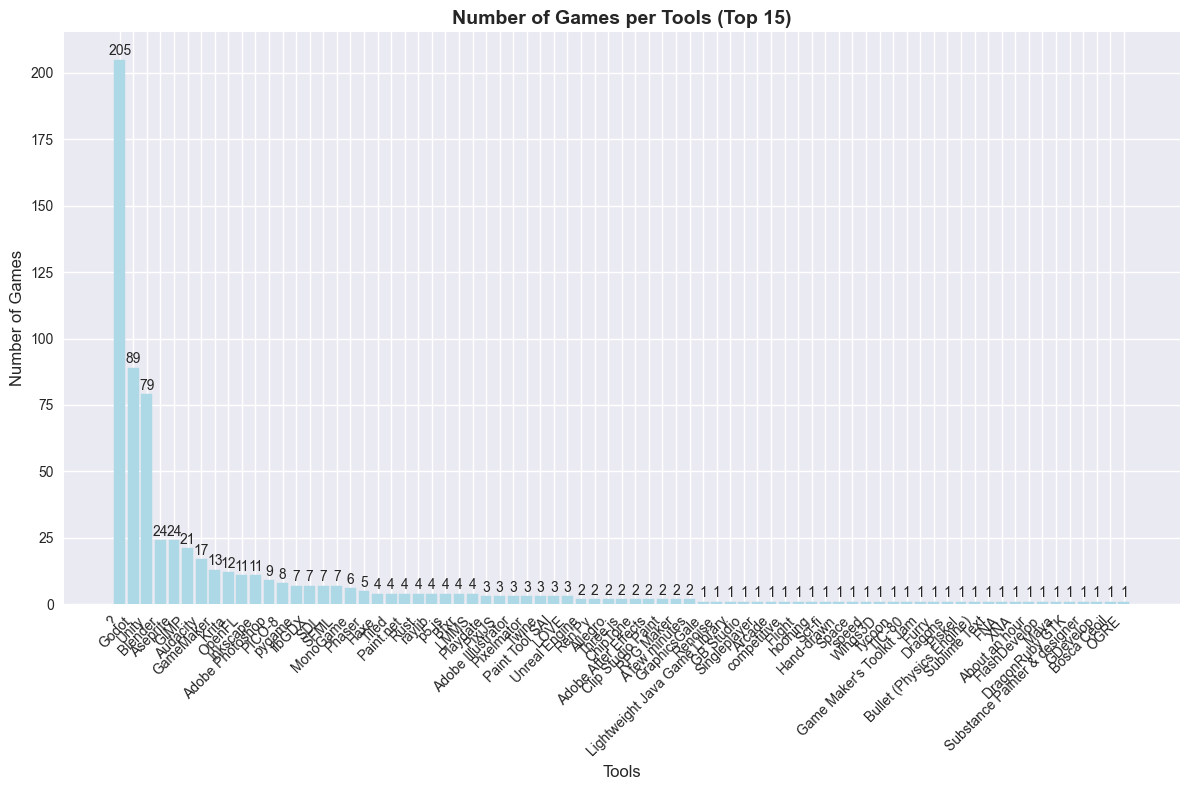


Note: A game may use multiple engines/frameworks, so the total count (665)
may exceed the number of games (491).


In [ ]:

print("Game Engine and Framework Analysis:")
print("=" * 45)


df['Made with'] = df['Made with'].fillna('Unknown')


all_engines = []
for engines in df['Made with']:
    if pd.notna(engines) and engines != 'Unknown':
        
        engine_list = [engine.strip() for engine in str(engines).split(',')]
        all_engines.extend(engine_list)


engine_counts = Counter(all_engines)


engine_df = pd.DataFrame(list(engine_counts.items()), columns=['Engine/Framework', 'Count'])
engine_df = engine_df.sort_values('Count', ascending=False)

print(f"Total engine/framework mentions: {len(all_engines)}")
print(f"Unique engines/frameworks: {len(engine_counts)}")

print("\nengines/frameworks:")
top_engines = engine_df
for _, row in top_engines.iterrows():
    percentage = (row['Count'] / len(df)) * 100
    print(f"  {row['Engine/Framework']}: {row['Count']} ({percentage:.1f}%)")


plt.figure(figsize=(12, 8))
top_engines_plot = engine_df
bars = plt.bar(range(len(top_engines_plot)), top_engines_plot['Count'], 
               color='lightblue', edgecolor='lightblue', alpha=1.0)
plt.xlabel('Tools', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Number of Games per Tools', fontsize=14, fontweight='bold')
plt.xticks(range(len(top_engines_plot)), top_engines_plot['Engine/Framework'], rotation=45, ha='right')


for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nNote: A game may use multiple engines/frameworks, so the total count ({len(all_engines)})")
print(f"may exceed the number of games ({len(df)}).")


## 2.1 Detected Game Engine Analysis

In [ ]:
# Analyze detected engines from engines_summary.csv
print("Detected Game Engine Analysis:")
print("=" * 45)

# Check if engine columns exist
engine_cols = ['engine_EngineOrFramework', 'engine_Confidence', 'engine_Evidence']
if all(col in df.columns for col in engine_cols):
    # Clean the data
    df['engine_EngineOrFramework'] = df['engine_EngineOrFramework'].fillna('Unknown')
    df['engine_Confidence'] = pd.to_numeric(df['engine_Confidence'], errors='coerce').fillna(0)
    
    # Count engine occurrences
    engine_counts = df['engine_EngineOrFramework'].value_counts()
    
    print(f"Total games analyzed: {len(df)}")
    print(f"Unique engines detected: {len(engine_counts)}")
    print(f"Games with detected engines: {(df['engine_EngineOrFramework'] != 'Unknown').sum()}")
    print(f"Games with unknown engines: {(df['engine_EngineOrFramework'] == 'Unknown').sum()}")
    
    print("\nTop detected engines:")
    for engine, count in engine_counts.items():
        percentage = (count / len(df)) * 100
        avg_confidence = df[df['engine_EngineOrFramework'] == engine]['engine_Confidence'].mean()
        print(f"  {engine}: {count} games ({percentage:.1f}%) - Avg confidence: {avg_confidence:.2f}")
    
    # Average confidence by engine
    print("\nAverage confidence scores by engine:")
    engine_confidence = df[df['engine_EngineOrFramework'] != 'Unknown'].groupby('engine_EngineOrFramework')['engine_Confidence'].agg(['mean', 'count']).sort_values('count', ascending=False)
    print(engine_confidence.to_string())

Detected Game Engine Analysis:
Total games analyzed: 491
Unique engines detected: 15
Games with detected engines: 260
Games with unknown engines: 231

Top detected engines:
  Unknown: 231 games (47.0%) - Avg confidence: 0.00
  Godot: 120 games (24.4%) - Avg confidence: 0.99
  Unity: 84 games (17.1%) - Avg confidence: 0.98
  LÖVE: 10 games (2.0%) - Avg confidence: 0.80
  GameMaker: 9 games (1.8%) - Avg confidence: 0.95
  HaxeFlixel: 8 games (1.6%) - Avg confidence: 0.85
  libGDX: 7 games (1.4%) - Avg confidence: 0.90
  Phaser: 5 games (1.0%) - Avg confidence: 0.90
  Bevy: 4 games (0.8%) - Avg confidence: 0.90
  Ren'Py: 3 games (0.6%) - Avg confidence: 0.95
  PixiJS: 3 games (0.6%) - Avg confidence: 0.80
  Unreal Engine: 3 games (0.6%) - Avg confidence: 0.98
  MonoGame/XNA: 2 games (0.4%) - Avg confidence: 0.90
  RPG Maker: 1 games (0.2%) - Avg confidence: 0.85
  Pygame/Python: 1 games (0.2%) - Avg confidence: 0.75

Average confidence scores by engine (top 10):
                          

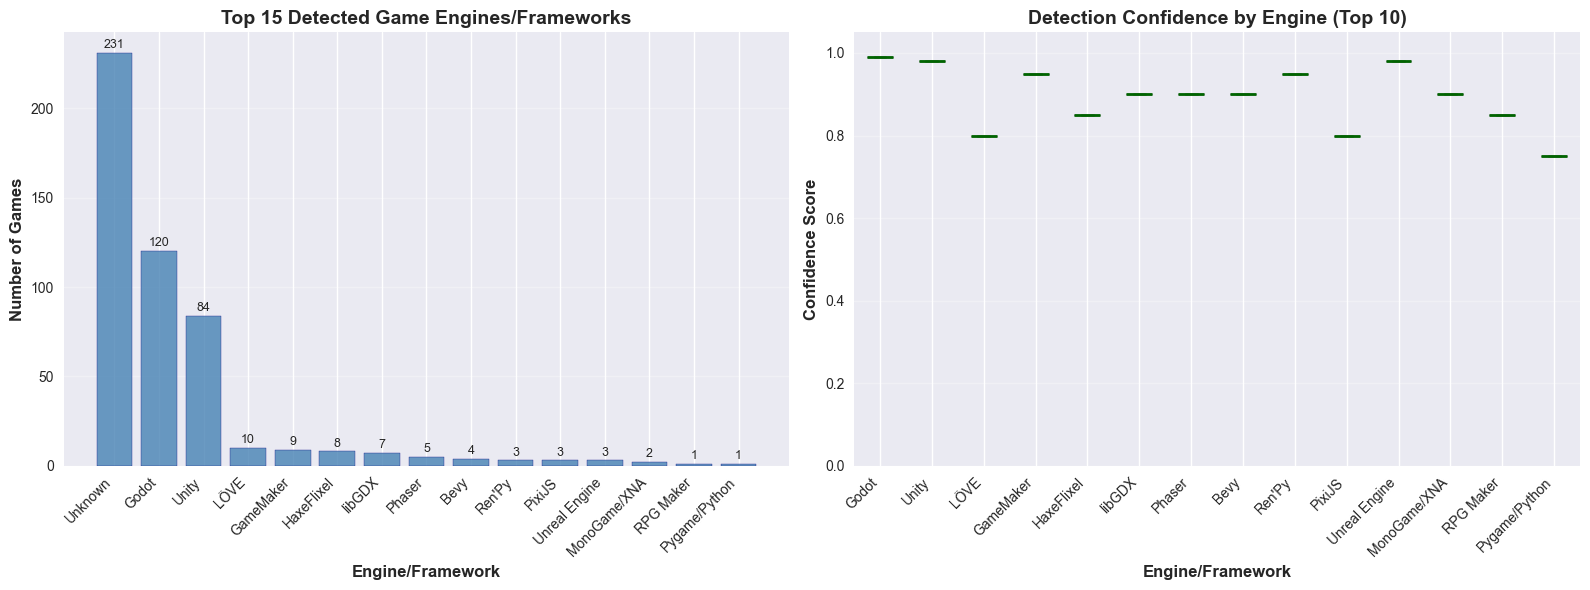


Engine Detection Evidence Analysis:


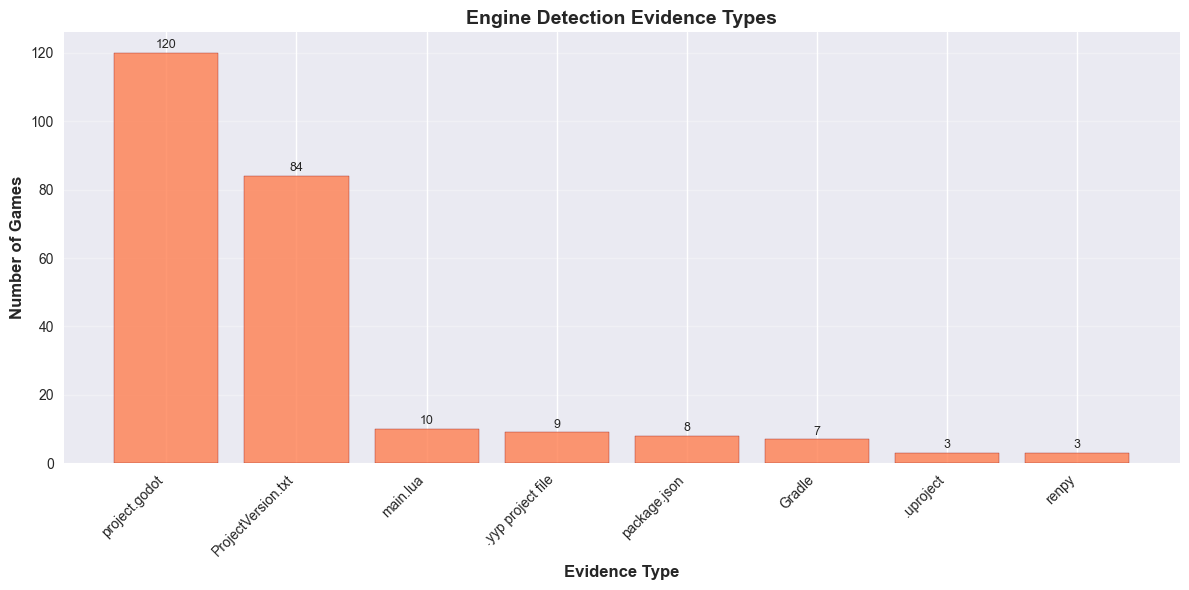


Evidence type distribution:
     Evidence Type  Count
     project.godot    120
ProjectVersion.txt     84
          main.lua     10
 .yyp project file      9
      package.json      8
            Gradle      7
         .uproject      3
             renpy      3


In [ ]:
# Create visualizations for detected engines
if all(col in df.columns for col in engine_cols):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Top engines bar chart
    top_engines = df['engine_EngineOrFramework'].value_counts()
    bars = axes[0].bar(range(len(top_engines)), top_engines.values, 
                       color='steelblue', edgecolor='navy', alpha=0.8)
    axes[0].set_xlabel('Engine/Framework', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Number of Games', fontsize=12, fontweight='bold')
    axes[0].set_title('Detected Game Engines/Frameworks', fontsize=14, fontweight='bold')
    axes[0].set_xticks(range(len(top_engines)))
    axes[0].set_xticklabels(top_engines.index, rotation=45, ha='right')
    axes[0].grid(axis='y', alpha=0.3)
    
else:
    print("Engine columns not found. Skipping visualization.")

## 3. Asset Analysis


In [6]:
# Analyze asset types
asset_columns = ['assets_Images', 'assets_Audio', 'assets_3D Models', 'assets_Shaders', 
                'assets_Fonts', 'assets_Videos', 'assets_Tilemaps']

print("Asset Analysis:")
print("=" * 30)

# Convert asset columns to numeric
for col in asset_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate statistics for each asset type
asset_stats = []
for col in asset_columns:
    if col in df.columns:
        data = df[col].dropna()
        if len(data) > 0:
            stats = {
                'Asset_Type': col.replace('assets_', ''),
                'Count': len(data),
                'Mean': f"{data.mean():.2f}",
                'Std': f"{data.std():.2f}",
                'Median': f"{data.median():.2f}",
                'Min': f"{data.min():.2f}",
                'Max': f"{data.max():.2f}"
            }
        else:
            stats = {
                'Asset_Type': col.replace('assets_', ''),
                'Count': 0,
                'Mean': 'N/A',
                'Std': 'N/A',
                'Median': 'N/A',
                'Min': 'N/A',
                'Max': 'N/A'
            }
        asset_stats.append(stats)

# Display statistics table
asset_stats_df = pd.DataFrame(asset_stats)
print("Asset Statistics:")
print(asset_stats_df.to_string(index=False))


Asset Analysis:
Asset Statistics:
Asset_Type  Count   Mean    Std Median  Min      Max
    Images    491 152.39 950.50  26.00 0.00 20196.00
     Audio    491  22.98 101.36   4.00 0.00  1802.00
 3D Models    491   6.82  42.68   0.00 0.00   608.00
   Shaders    491   9.60 134.00   0.00 0.00  2964.00
     Fonts    491   2.27   4.75   1.00 0.00    41.00
    Videos    491   0.30   4.48   0.00 0.00    97.00
  Tilemaps    491   2.25  28.58   0.00 0.00   543.00


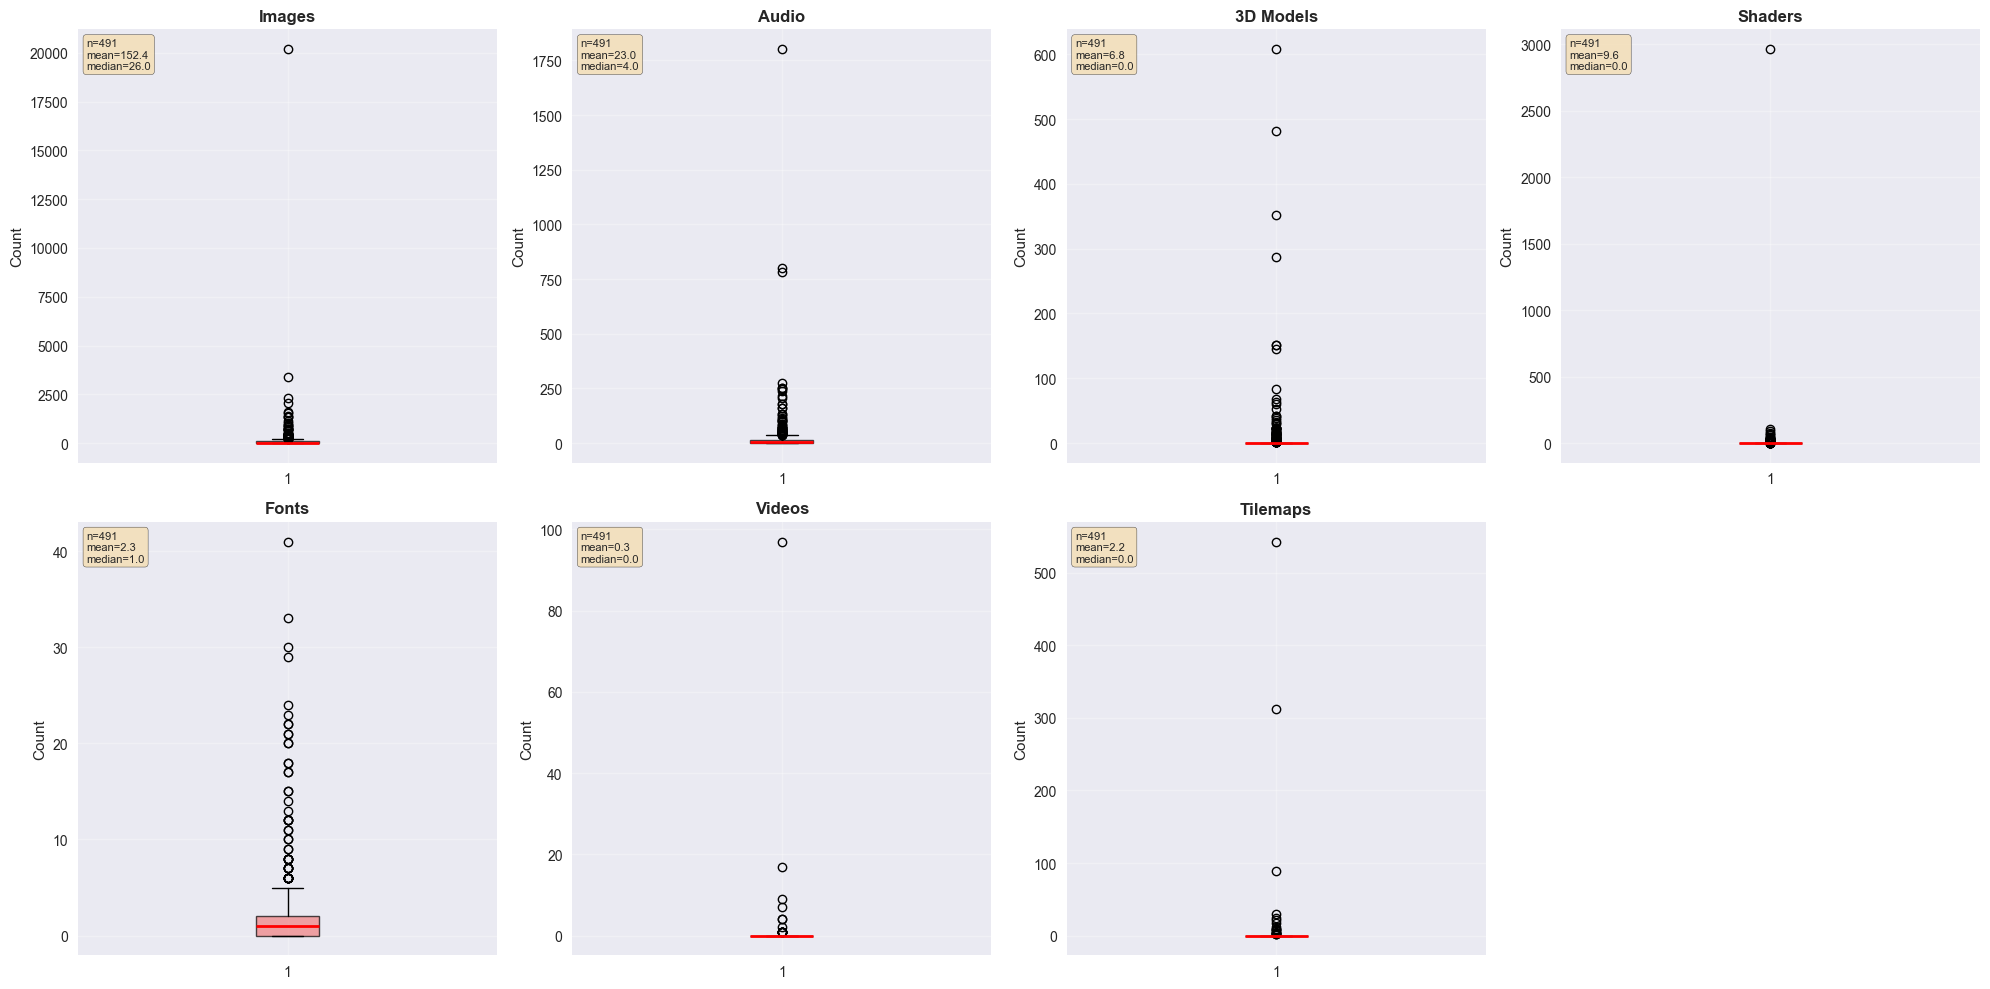

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(asset_columns):
    if col in df.columns:
        data = df[col].dropna()
        if len(data) > 0:
            axes[i].boxplot(data, patch_artist=True, 
                           boxprops=dict(facecolor='lightcoral', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2))
            axes[i].set_title(f'{col.replace("assets_", "")}', fontweight='bold')
            axes[i].set_ylabel('Count')
            axes[i].grid(True, alpha=0.3)
            
            stats_text = f'n={len(data)}\nmean={data.mean():.1f}\nmedian={data.median():.1f}'
            axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                        verticalalignment='top', fontsize=8,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
            axes[i].text(0.5, 0.5, 'No data', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{col.replace("assets_", "")} (No data)', fontweight='bold')
    else:
        axes[i].text(0.5, 0.5, 'Column not found', ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'{col.replace("assets_", "")} (Not found)', fontweight='bold')

if len(asset_columns) < 8:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()
